<a href="https://colab.research.google.com/github/WOLFIEEEE/Covid_Xray-model/blob/main/Covid_Xray_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
 
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
!unzip "/content/gdrive/MyDrive/archive.zip"

Archive:  /content/gdrive/MyDrive/archive.zip
  inflating: Covid-Model_dataset/Test/Normal/IM-0115-0001.jpeg  
  inflating: Covid-Model_dataset/Test/Normal/IM-0117-0001.jpeg  
  inflating: Covid-Model_dataset/Test/Normal/IM-0119-0001.jpeg  
  inflating: Covid-Model_dataset/Test/Normal/IM-0122-0001.jpeg  
  inflating: Covid-Model_dataset/Test/Normal/IM-0125-0001.jpeg  
  inflating: Covid-Model_dataset/Test/Normal/IM-0127-0001.jpeg  
  inflating: Covid-Model_dataset/Test/Normal/IM-0128-0001.jpeg  
  inflating: Covid-Model_dataset/Test/Normal/IM-0129-0001.jpeg  
  inflating: Covid-Model_dataset/Test/Normal/IM-0131-0001.jpeg  
  inflating: Covid-Model_dataset/Test/Normal/IM-0133-0001.jpeg  
  inflating: Covid-Model_dataset/Test/Normal/IM-0135-0001.jpeg  
  inflating: Covid-Model_dataset/Test/Normal/IM-0137-0001.jpeg  
  inflating: Covid-Model_dataset/Test/Normal/IM-0140-0001.jpeg  
  inflating: Covid-Model_dataset/Test/Normal/IM-0141-0001.jpeg  
  inflating: Covid-Model_dataset/Test/Normal

Importing required Libraries in te next layers 

In [ ]:
#Importing required libraries.
from keras.models import Sequential
# To initialize neural network
from keras.layers import Convolution2D
# Images are two dimensional, concolution step
from keras.layers import MaxPooling2D
# Pooling step
from keras.layers import Flatten
# Convert pools feature map into this large feature vector
from keras.layers import Dense
#To add fully connected layers

In [ ]:
!pip install joblib


In [ ]:
import pickle

In the next block we will be specifying to calculate paramterers on which we will be going to train our model , we will be using CNN for this .

In [ ]:
#Initializing the CNN
#There is also a graph option but we'll use sequential ANN Model
classifier = Sequential()

#step 1 - Convolution
#creating the feature map by using feature detector from ınput image

classifier.add( Convolution2D(32,3,3, input_shape=(64,64,3), activation='relu'))

In [ ]:
#step -2 Pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

#second convolution and pooling steps.
classifier.add( Convolution2D(32,3,3, input_shape=(64,64,3), activation='relu'))

classifier.add(MaxPooling2D(pool_size = (2,2)))

In [ ]:
#step -3 Flattening
classifier.add(Flatten())

In [ ]:
#step-4 Full connection step
classifier.add(Dense(256, activation = 'relu'))
classifier.add(Dense( 1, activation = 'sigmoid'))
#binary outcome

In [ ]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 21, 21, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               8448      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [ ]:
#compiling the cnn

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

Traing and Fitting our model according to CNN feature extraction

In [ ]:
#Fitting to CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        '/content/Covid-Model_dataset/Train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        '/content/Covid-Model_dataset/Test',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')
#We'll try to train with 100 Epochs
results=classifier.fit_generator(
        training_set,
        steps_per_epoch=10,
        epochs=12,
        validation_data=test_set,
        validation_steps=2)

Found 320 images belonging to 2 classes.
Found 72 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/12
10/10 [==============================] - 12s 1s/step - loss: 0.6908 - accuracy: 0.5167 - val_loss: 0.6631 - val_accuracy: 0.5156
Epoch 2/12
10/10 [==============================] - 11s 1s/step - loss: 0.6681 - accuracy: 0.5138 - val_loss: 0.6141 - val_accuracy: 0.8438
Epoch 3/12
10/10 [==============================] - 11s 1s/step - loss: 0.6150 - accuracy: 0.7655 - val_loss: 0.5058 - val_accuracy: 0.8906
Epoch 4/12
10/10 [==============================] - 11s 1s/step - loss: 0.5161 - accuracy: 0.8532 - val_loss: 0.3876 - val_accuracy: 0.8594
Epoch 5/12
10/10 [==============================] - 11s 1s/step - loss: 0.4412 - accuracy: 0.8153 - val_loss: 0.3607 - val_accuracy: 0.8750
Epoch 6/12
10/10 [==============================] - 11s 1s/step - loss: 0.3576 - accuracy: 0.8427 - val_loss: 0.2602 - val_accuracy: 0.8750
Epoch 7/12
10/10 [==============================] - 11s 1s/step - loss: 0.3542 - accuracy: 0.8360 - val_loss: 0.2479 - val_accuracy: 0.8906
Epoch 8/12
10/10 [==

In [ ]:
pickle.dump(classifier, open('model.pkl','wb'))

TypeError: ignored

Plotting A graph over validation loss and validation accuracy over epochs

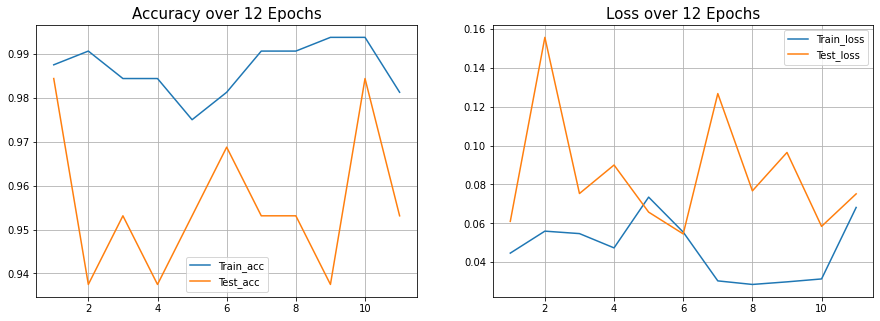

In [ ]:
import matplotlib.pyplot as plt
def plot_acc_loss(results, epochs):
 acc = results.history['accuracy']
 loss = results.history['loss']
 val_acc = results.history['val_accuracy']
 val_loss = results.history['val_loss']
 plt.figure(figsize=(15, 5))
 plt.subplot(121)
 plt.plot(range(1,epochs), acc[1:], label='Train_acc')
 plt.plot(range(1,epochs), val_acc[1:], label='Test_acc')
 plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
 plt.legend()
 plt.grid(True)
 plt.subplot(122)
 plt.plot(range(1,epochs), loss[1:], label='Train_loss')
 plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
 plt.title('Loss over ' + str(epochs) +  ' Epochs', size=15)
 plt.legend()
 plt.grid(True)
 plt.show()
 
plot_acc_loss(results,12)

Using Python to make prediction of a single Image

Trying what we have to do in our website

In [ ]:
# Part 3 - Making new predictions
# Testing
import numpy as np
from keras.preprocessing import image

#First learn the classification indices.
print(training_set.class_indices)


{'Normal': 0, 'positive': 1}


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


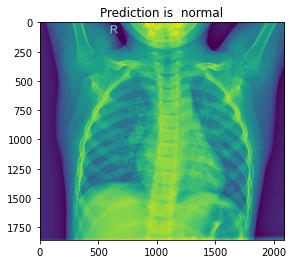

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('/content/Covid-Model_dataset/Test/Normal/IM-0115-0001.jpeg')
imgplot = plt.imshow(img)

test_image = image.load_img('/content/Covid-Model_dataset/Test/Normal/IM-0115-0001.jpeg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)

if result[0][0] == 1:
    prediction = 'covid'
else:
    prediction = 'normal'
    
#print("AI's prediction is: "+ prediction)

plt=plt.title('Prediction is  '+ prediction )
#There we will test this following image, COVID-19 positive